In [29]:
#initialize packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [30]:
#change to directory
import os
os.chdir('C:\\Users\\trevo\\OneDrive - UNT System\\PhD\\Ta Actuator\\Sensors and Actuators A- Physical\\Data')
#open excel
flexheat = pd.read_excel('data_4_19_2023.xlsx',sheet_name="flexheat")
fan = pd.read_excel('data_4_19_2023.xlsx',sheet_name="fan")
nofan = pd.read_excel('data_4_19_2023.xlsx',sheet_name="nofan")



In [31]:
#take flexheat total height and subtract sample height
flexheat['elongation (mm)'] = flexheat['Total height'] - flexheat['sample height']
fan['elongation (mm)'] = fan['enlongation']
nofan['elongation (mm)'] = nofan['total height'] - nofan['sample height']

In [32]:
#rename the three dataframes columns so Time is time (s), elongation is elongation (mm), and temperature is temperature (C)
flexheat = flexheat.rename(columns={'time':'time (s)'})
fan = fan.rename(columns={'Time':'time (s)','temp':'temperature (C)'})
nofan = nofan.rename(columns={'Time':'time (s)','temp':'temperature (C)'})
#reorder the three dataframes so they are time, elongation, and temperature
flexheat = flexheat[['time (s)','elongation (mm)']]
fan = fan[['time (s)','elongation (mm)','temperature (C)']]
nofan = nofan[['time (s)','elongation (mm)','temperature (C)']]

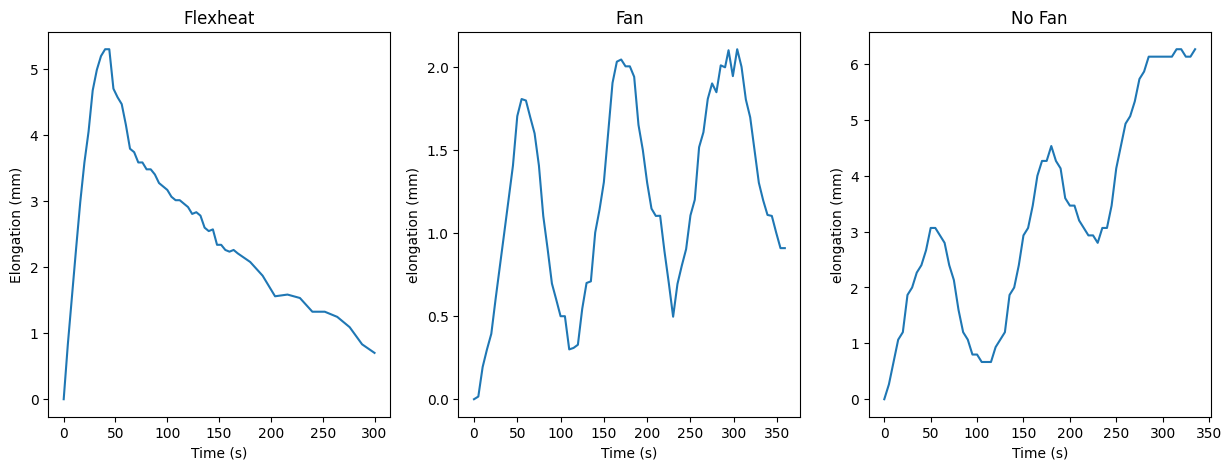

In [35]:
#plot the three dataframes
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.lineplot(x='time (s)',y='elongation (mm)',data=flexheat,ax=ax[0])
sns.lineplot(x='time (s)',y='elongation (mm)',data=fan,ax=ax[1])
sns.lineplot(x='time (s)',y='elongation (mm)',data=nofan,ax=ax[2])
ax[0].set_title('Flexheat')
ax[1].set_title('Fan')
ax[2].set_title('No Fan')
ax[0].set_ylabel('Elongation (mm)')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
ax[2].set_xlabel('Time (s)')
plt.show()

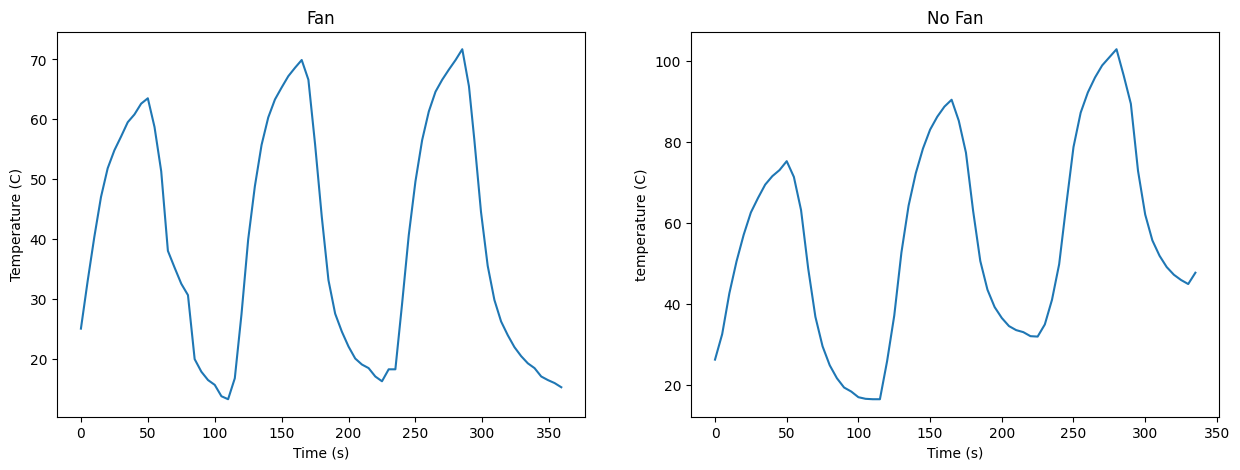

In [36]:
#plot temperatures for fan and nofan
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.lineplot(x='time (s)',y='temperature (C)',data=fan,ax=ax[0])
sns.lineplot(x='time (s)',y='temperature (C)',data=nofan,ax=ax[1])
ax[0].set_title('Fan')
ax[1].set_title('No Fan')
ax[0].set_ylabel('Temperature (C)')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
plt.show()

In [33]:
m = 9.53; #grams

In [34]:
print(nofan.head())

   time (s)  elongation (mm)  temperature (C)
0         0         0.000000             26.2
1         5         0.266512             32.5
2        10         0.666279             42.6
3        15         1.066047             50.5
4        20         1.199302             57.1
